# Forex Trend Prediction

Trend Analysis on XAUUSD pair and build a model to predict the trend and the price

In [19]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Load

In [21]:
xauusd = pd.read_csv(r'C:\Users\Arie\Documents\Portfolio\Forex Trend Analysis Project\XAU_USD Historical Data (1).csv')
xauusd.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/31/2024,"2,623.81","2,606.13","2,627.85","2,602.50",NaN,0.71%
1,12/30/2024,"2,605.39","2,620.30","2,628.61","2,595.90",NaN,-0.56%
2,12/27/2024,"2,620.00","2,634.59","2,638.74","2,611.30",NaN,-0.55%
3,12/26/2024,"2,634.43","2,619.79","2,639.40","2,614.13",NaN,0.81%
4,12/24/2024,"2,613.20","2,613.07","2,621.83","2,609.92",NaN,0.01%


In [22]:
xauusd.shape

(2863, 7)

## Data Cleaning

### Missing Value Handling

In [23]:
xauusd.isna().sum()

Date           0
Price          0
Open           0
High           0
Low            0
Vol.        2862
Change %       0
dtype: int64

As we can see the Volume column have almost 90% missing value so we decided to drop the column

In [24]:
# Drop volume column
xauusd = xauusd.drop(columns='Vol.')
xauusd.head()

,Date,Price,Open,High,Low,Change %
0,12/31/2024,"2,623.81","2,606.13","2,627.85","2,602.50",0.71%
1,12/30/2024,"2,605.39","2,620.30","2,628.61","2,595.90",-0.56%
2,12/27/2024,"2,620.00","2,634.59","2,638.74","2,611.30",-0.55%
3,12/26/2024,"2,634.43","2,619.79","2,639.40","2,614.13",0.81%
4,12/24/2024,"2,613.20","2,613.07","2,621.83","2,609.92",0.01%


### Duplicate Rows Handling

In [25]:
# Checking Duplicated Row
len(xauusd.drop_duplicates()) / len(xauusd)

1.0

No duplicated rows

## Data Manipulation

In [27]:
# Check for xauusd types
xauusd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2863 entries, 0 to 2862
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2863 non-null   object
 1   Price     2863 non-null   object
 2   Open      2863 non-null   object
 3   High      2863 non-null   object
 4   Low       2863 non-null   object
 5   Change %  2863 non-null   object
dtypes: object(6)
memory usage: 134.3+ KB


In [28]:
# Change xauusd Types

xauusd['Price'] =  xauusd['Price'].str.replace(',', '').astype(float)
xauusd['Open'] = xauusd['Open'].str.replace(',', '').astype(float)
xauusd['High'] = xauusd['High'].str.replace(',', '').astype(float)
xauusd['Low'] = xauusd['Low'].str.replace(',', '').astype(float)
xauusd['Change %'] = xauusd['Change %'].str.rstrip('%').astype(float) / 100

xauusd.head()

,Date,Price,Open,High,Low,Change %
0,12/31/2024,2623.81,2606.13,2627.85,2602.50,0.0071
1,12/30/2024,2605.39,2620.30,2628.61,2595.90,-0.0056
2,12/27/2024,2620.00,2634.59,2638.74,2611.30,-0.0055
3,12/26/2024,2634.43,2619.79,2639.40,2614.13,0.0081
4,12/24/2024,2613.20,2613.07,2621.83,2609.92,0.0001


In [29]:
# Change the column name to lowercase and remove the percentage symbol for easier
xauusd = xauusd.rename(columns={'Change %' : 'Change'}, errors='raise')
xauusd = xauusd.rename(str.lower, axis='columns')
xauusd.head()

,date,price,open,high,low,change
0,12/31/2024,2623.81,2606.13,2627.85,2602.50,0.0071
1,12/30/2024,2605.39,2620.30,2628.61,2595.90,-0.0056
2,12/27/2024,2620.00,2634.59,2638.74,2611.30,-0.0055
3,12/26/2024,2634.43,2619.79,2639.40,2614.13,0.0081
4,12/24/2024,2613.20,2613.07,2621.83,2609.92,0.0001


In [30]:
# Date to datetime

xauusd['date'] = pd.to_datetime(xauusd['date'])
xauusd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2863 entries, 0 to 2862
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2863 non-null   datetime64[ns]
 1   price   2863 non-null   float64       
 2   open    2863 non-null   float64       
 3   high    2863 non-null   float64       
 4   low     2863 non-null   float64       
 5   change  2863 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 134.3 KB


In [33]:
xauusd.head()

,date,price,open,high,low,change
0,2024-12-31,2623.81,2606.13,2627.85,2602.50,0.0071
1,2024-12-30,2605.39,2620.30,2628.61,2595.90,-0.0056
2,2024-12-27,2620.00,2634.59,2638.74,2611.30,-0.0055
3,2024-12-26,2634.43,2619.79,2639.40,2614.13,0.0081
4,2024-12-24,2613.20,2613.07,2621.83,2609.92,0.0001


## Outlier Checking

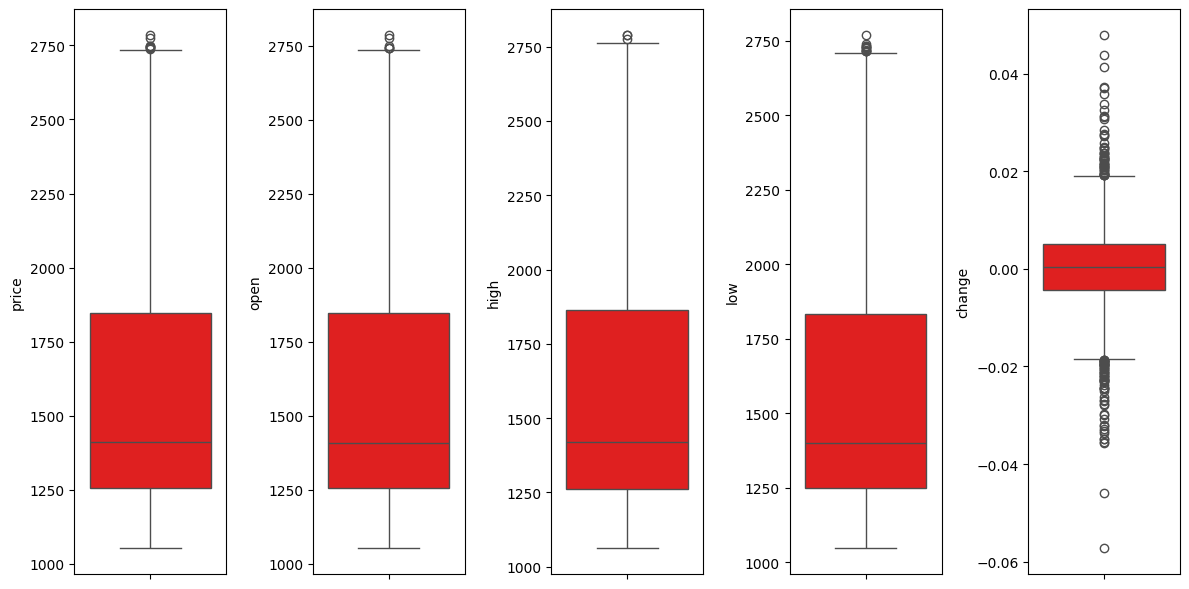

In [34]:
# Check for outlier
cols = ['price', 'open', 'high', 'low', 'change']

plt.figure(figsize=(12,6))
for i in range(0, len(cols)):
    plt.subplot(1, len(cols), i+1)
    sns.boxplot(y=xauusd[cols[i]], color='red')
    plt.tight_layout()

As we can see the xauusd is quite clean and no need for outlier handling considering the financial market is very volatile

## Extract the clean XAUUSD data into csv file

In [35]:
xauusd.to_csv('clean_xauusd.csv', index=False)